In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.optimize import curve_fit

In [2]:
bitcoin_df = pd.DataFrame(np.genfromtxt("data/bitcoin_data_1_year.csv", delimiter=';', dtype=None, encoding=None))
df = pd.DataFrame(np.genfromtxt("data/ethereum_data_1_year.csv", delimiter=';', dtype=None, encoding=None))

In [3]:
new_headers = df.iloc[0]
df.columns = new_headers
df = df[1:]
new_headers_ethereum = bitcoin_df.iloc[0]
bitcoin_df.columns = new_headers
bitcoin_df = bitcoin_df[1:]

In [4]:
df.drop(['timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow'], axis=1, inplace=True)
bitcoin_df.drop(['\ufefftimeOpen', 'timeClose', 'timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow', 'close'], axis=1, inplace=True)

In [5]:
bitcoin_df.rename(columns={'open': 'btc_open', 'high': 'btc_high', 'low': 'btc_low', 'volume': 'btc_volume'}, inplace=True)

In [6]:
df['timeClose'] = df['timeClose'].str.replace('"', '')
df['timeClose'] = df['timeClose'].str.replace('T23:59:59.999Z', '')
df['timeClose'] = df['timeClose'].str.replace('-', '')

In [7]:
df["timeClose"] = pd.to_datetime(df["timeClose"])
df["timeClose"] = (df["timeClose"] - df["timeClose"].iloc[-1])

In [8]:
df["timeClose"] = df["timeClose"].dt.days.astype(int)
df["close"] = (df["close"].astype(float))
df["open"] = (df["open"].astype(float))
df["high"] = (df["high"].astype(float))
df["low"] = (df["low"].astype(float))
df["volume"] = (df["volume"].astype(float))
bitcoin_df["btc_open"] = (bitcoin_df["btc_open"].astype(float))
bitcoin_df["btc_high"] = (bitcoin_df["btc_high"].astype(float))
bitcoin_df["btc_low"] = (bitcoin_df["btc_low"].astype(float))
bitcoin_df["btc_volume"] = (bitcoin_df["btc_volume"].astype(float))

In [9]:
X_sing = df['timeClose'].values.reshape(-1, 1)
X_multi = pd.concat([df[['timeClose', 'open', 'high', 'low', 'volume']], bitcoin_df[['btc_open', 'btc_high', 'btc_low', 'btc_volume']]], axis=1)
y = df['close'].values.reshape(-1, 1)

In [10]:
X_train_sing, X_test_sing, y_train_sing, y_test_sing = train_test_split(X_sing, y, test_size=0.2)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2)

In [11]:
degree = 7
polyreg_sing = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])
polyreg_sing.fit(X_train_sing, y_train_sing)

line_of_best_fit = LinearRegression()
line_of_best_fit.fit(X_sing, y)

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_predicted_sing = polyreg_sing.predict(X_test_sing)
r2_sing = r2_score(y_test_sing, y_predicted_sing)
y_predicted_multi = model_multi.predict(X_test_multi)
r2_multi = r2_score(y_test_multi, y_predicted_multi)
print(r2_sing)
print(r2_multi)

0.8856848151001496
0.9974028310472827


In [13]:
print(f"Cross validation for multivariable regression: {str(cross_val_score(model_multi, X_test_multi, y_test_multi, cv=10).mean())}")
print(f"MSE for multivariable regression: {str(mean_squared_error(y_test_multi, y_predicted_multi))}")
print(f"MAPE for multivariable regression: {str(round(mean_absolute_percentage_error(y_test_multi, y_predicted_multi) * 100, 5))}% \n")
print("Cross validation for polynomial regression: " + str(cross_val_score(polyreg_sing, X_test_sing, y_test_sing, cv=10).mean()))
print("MSE for polynomial regression: " + str(mean_squared_error(y_test_sing, y_predicted_sing)))
print(f"MAPE for polynomial regression: {str(round(mean_absolute_percentage_error(y_test_sing, y_predicted_sing) * 100, 5))}% \n")

Cross validation for multivariable regression: 0.9965586741165209
MSE for multivariable regression: 1727.3427640804173
MAPE for multivariable regression: 1.09278% 

Cross validation for polynomial regression: 0.852700290646229
MSE for polynomial regression: 82432.85715092155
MAPE for polynomial regression: 7.8296% 



In [14]:
y_predicted = polyreg_sing.predict(X_sing)
y_pred = line_of_best_fit.predict(X_sing)

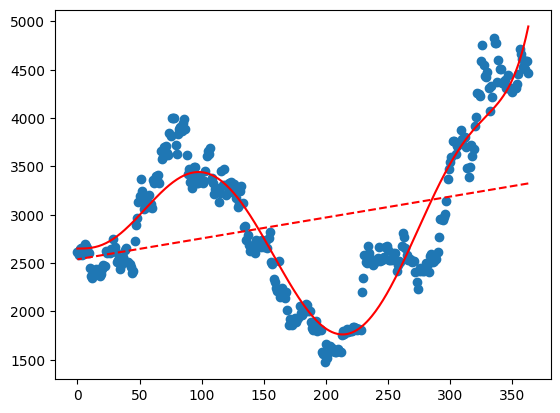

In [15]:
plt.scatter(X_sing, y)
plt.plot(X_sing, y_predicted, color='red', label='Line of Best Fit')
plt.plot(X_sing, y_pred, color='red', label='Line of Best Fit', linestyle='--')
plt.show()